In [7]:
from datasets import load_dataset

corpus = load_dataset('umarbutler/open-australian-legal-corpus', split='High Court of Australia', keep_in_memory=False) # Set `keep_in_memory` to `True` if you wish to load the entire corpus into memory.
print(corpus[0]['citation'])

ValueError: Split name should match '^\w+(\.\w+)*$' but got 'High Court of Australia'.

/home/maria/Documents/LegalRAG/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 229122/229122 [20:21<00:00, 187.63 examples/s]


Time taken to tokenize the dataset: 1221.44 seconds


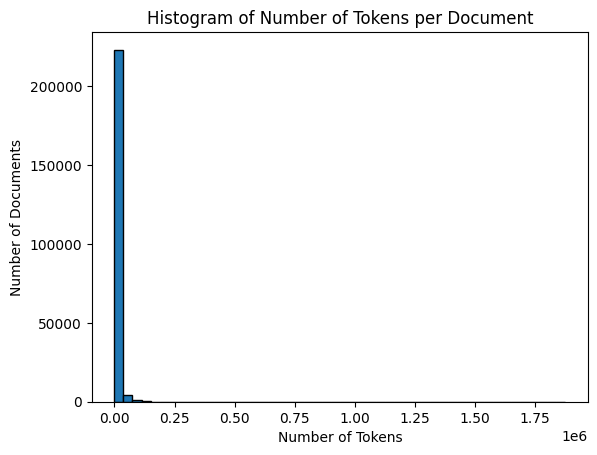

In [3]:
# Import necessary libraries
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import time

# Load the dataset
corpus = load_dataset('umarbutler/open-australian-legal-corpus', split='corpus', keep_in_memory=False)

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('joelniklaus/legal-xlm-roberta-base')

# Define a function to tokenize the text and compute token counts
def tokenize_function(examples):
    # Tokenize the text without truncation or padding
    tokenized = tokenizer(examples['text'], truncation=False, padding=False)
    # Compute the number of tokens for each example
    num_tokens = [len(input_ids) for input_ids in tokenized['input_ids']]
    # Add the number of tokens to the examples
    examples['num_tokens'] = num_tokens
    # Save the tokens for later use
    examples['tokens'] = tokenized['input_ids']
    return examples

start=time.time()
# Apply the tokenize_function to the dataset
corpus = corpus.map(tokenize_function, batched=True, batch_size=1000)

end=time.time()

print(f"Time taken to tokenize the dataset: {end-start:.2f} seconds")

# Collect the number of tokens into a list
num_tokens_list = corpus['num_tokens']

# Plot the histogram of token counts
plt.hist(num_tokens_list, bins=50, edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Documents')
plt.title('Histogram of Number of Tokens per Document')
plt.show()


In [4]:
num_tokens_list

[265,
 2922,
 9063,
 15444,
 2670,
 2454,
 207,
 4373,
 153,
 22171,
 4339,
 10691,
 1123,
 19034,
 3080,
 16460,
 16299,
 9316,
 104,
 2456,
 1985,
 2855,
 8132,
 508,
 14119,
 6385,
 711,
 1923,
 3412,
 22440,
 4919,
 29665,
 3810,
 3728,
 8443,
 46784,
 19559,
 32937,
 2403,
 108190,
 19260,
 33714,
 1957,
 649,
 25113,
 2893,
 10006,
 707,
 17713,
 1630,
 11162,
 7086,
 595,
 1384,
 1034,
 3093,
 6704,
 6248,
 46726,
 4798,
 2222,
 9122,
 1538,
 4470,
 3191,
 1338,
 8774,
 403,
 7069,
 1826,
 11801,
 9024,
 5049,
 11881,
 10830,
 13118,
 8301,
 5432,
 13079,
 5072,
 17510,
 3296,
 4256,
 2977,
 16413,
 9204,
 1803,
 54772,
 42314,
 53760,
 6296,
 64161,
 4097,
 3249,
 14335,
 2752,
 405,
 7780,
 52251,
 9442,
 66,
 3907,
 6667,
 2655,
 1569,
 17117,
 61648,
 24073,
 5871,
 2113,
 2123,
 375,
 2579,
 19444,
 231,
 1036,
 55783,
 9854,
 1404,
 595,
 2595,
 14013,
 207,
 4771,
 1319,
 15851,
 19186,
 656,
 12414,
 621,
 1157,
 6321,
 3751,
 5093,
 1571,
 5230,
 5028,
 19313,
 1094,
 4

In [6]:
average_tokens = sum(num_tokens_list) / len(num_tokens_list)
average_tokens

8256.644852960431